In [1]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt

import matplotlib.dates as mdates


In [2]:
#connection with database
df = pd.read_csv('dataset.csv')


In [3]:
print(df.head())

        ID_Pedido Data_Pedido ID_Cliente   Segmento           Pais  \
0  CA-2017-152156  08/11/2017   CG-12520   Consumer  United States   
1  CA-2017-152156  08/11/2017   CG-12520   Consumer  United States   
2  CA-2017-138688  12/06/2017   DV-13045  Corporate  United States   
3  US-2016-108966  11/10/2016   SO-20335   Consumer  United States   
4  US-2016-108966  11/10/2016   SO-20335   Consumer  United States   

            Cidade      Estado       ID_Produto        Categoria SubCategoria  \
0        Henderson    Kentucky  FUR-BO-10001798        Furniture    Bookcases   
1        Henderson    Kentucky  FUR-CH-10000454        Furniture       Chairs   
2      Los Angeles  California  OFF-LA-10000240  Office Supplies       Labels   
3  Fort Lauderdale     Florida  FUR-TA-10000577        Furniture       Tables   
4  Fort Lauderdale     Florida  OFF-ST-10000760  Office Supplies      Storage   

   Valor_Venda  
0     261.9600  
1     731.9400  
2      14.6200  
3     957.5775  
4      

In [4]:
print(df.columns)
print(df.dtypes)

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')
ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object


# Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?


In [5]:
filter = (df['Categoria'] == 'Office Supplies')


In [6]:
max_value = df.loc[filter, 'Valor_Venda'].max()
max_value

9892.74

# Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.

In [7]:

summed_df = df.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()

In [8]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], format='%d/%m/%Y')
df.set_index('Data_Pedido', inplace=True)

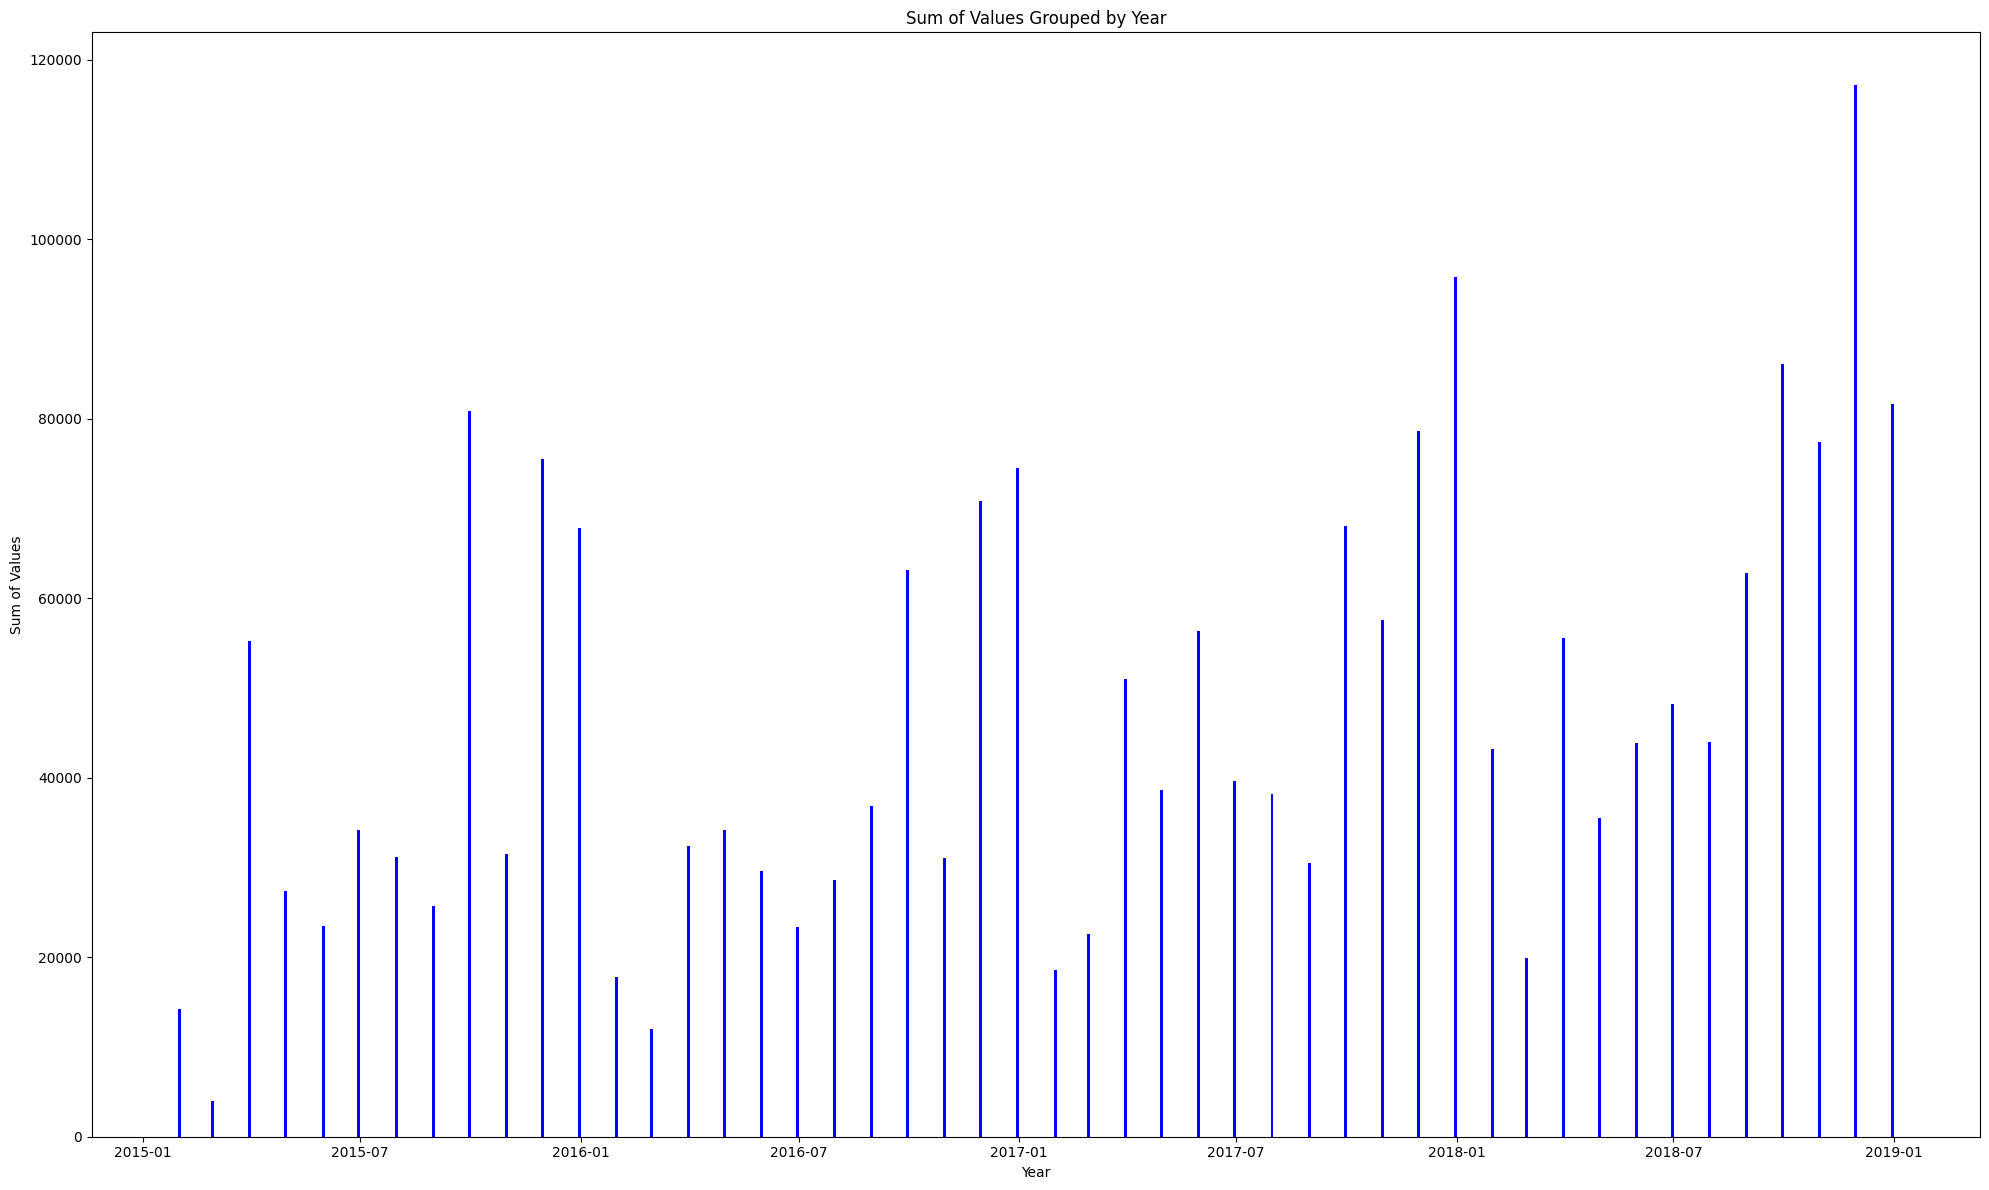

In [9]:
# Group by year and sum the values
df_grouped = df.groupby(pd.Grouper(freq='M')).sum()

# Plotting the data
plt.figure(figsize=(20, 12))
plt.bar(df_grouped.index, df_grouped['Valor_Venda'], color='blue', width=2.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.title('Sum of Values Grouped by Year')

plt.tight_layout()
plt.show()

# Qual o Total de Vendas por Estado?
Demonstre o resultado através de um gráfico de barras.

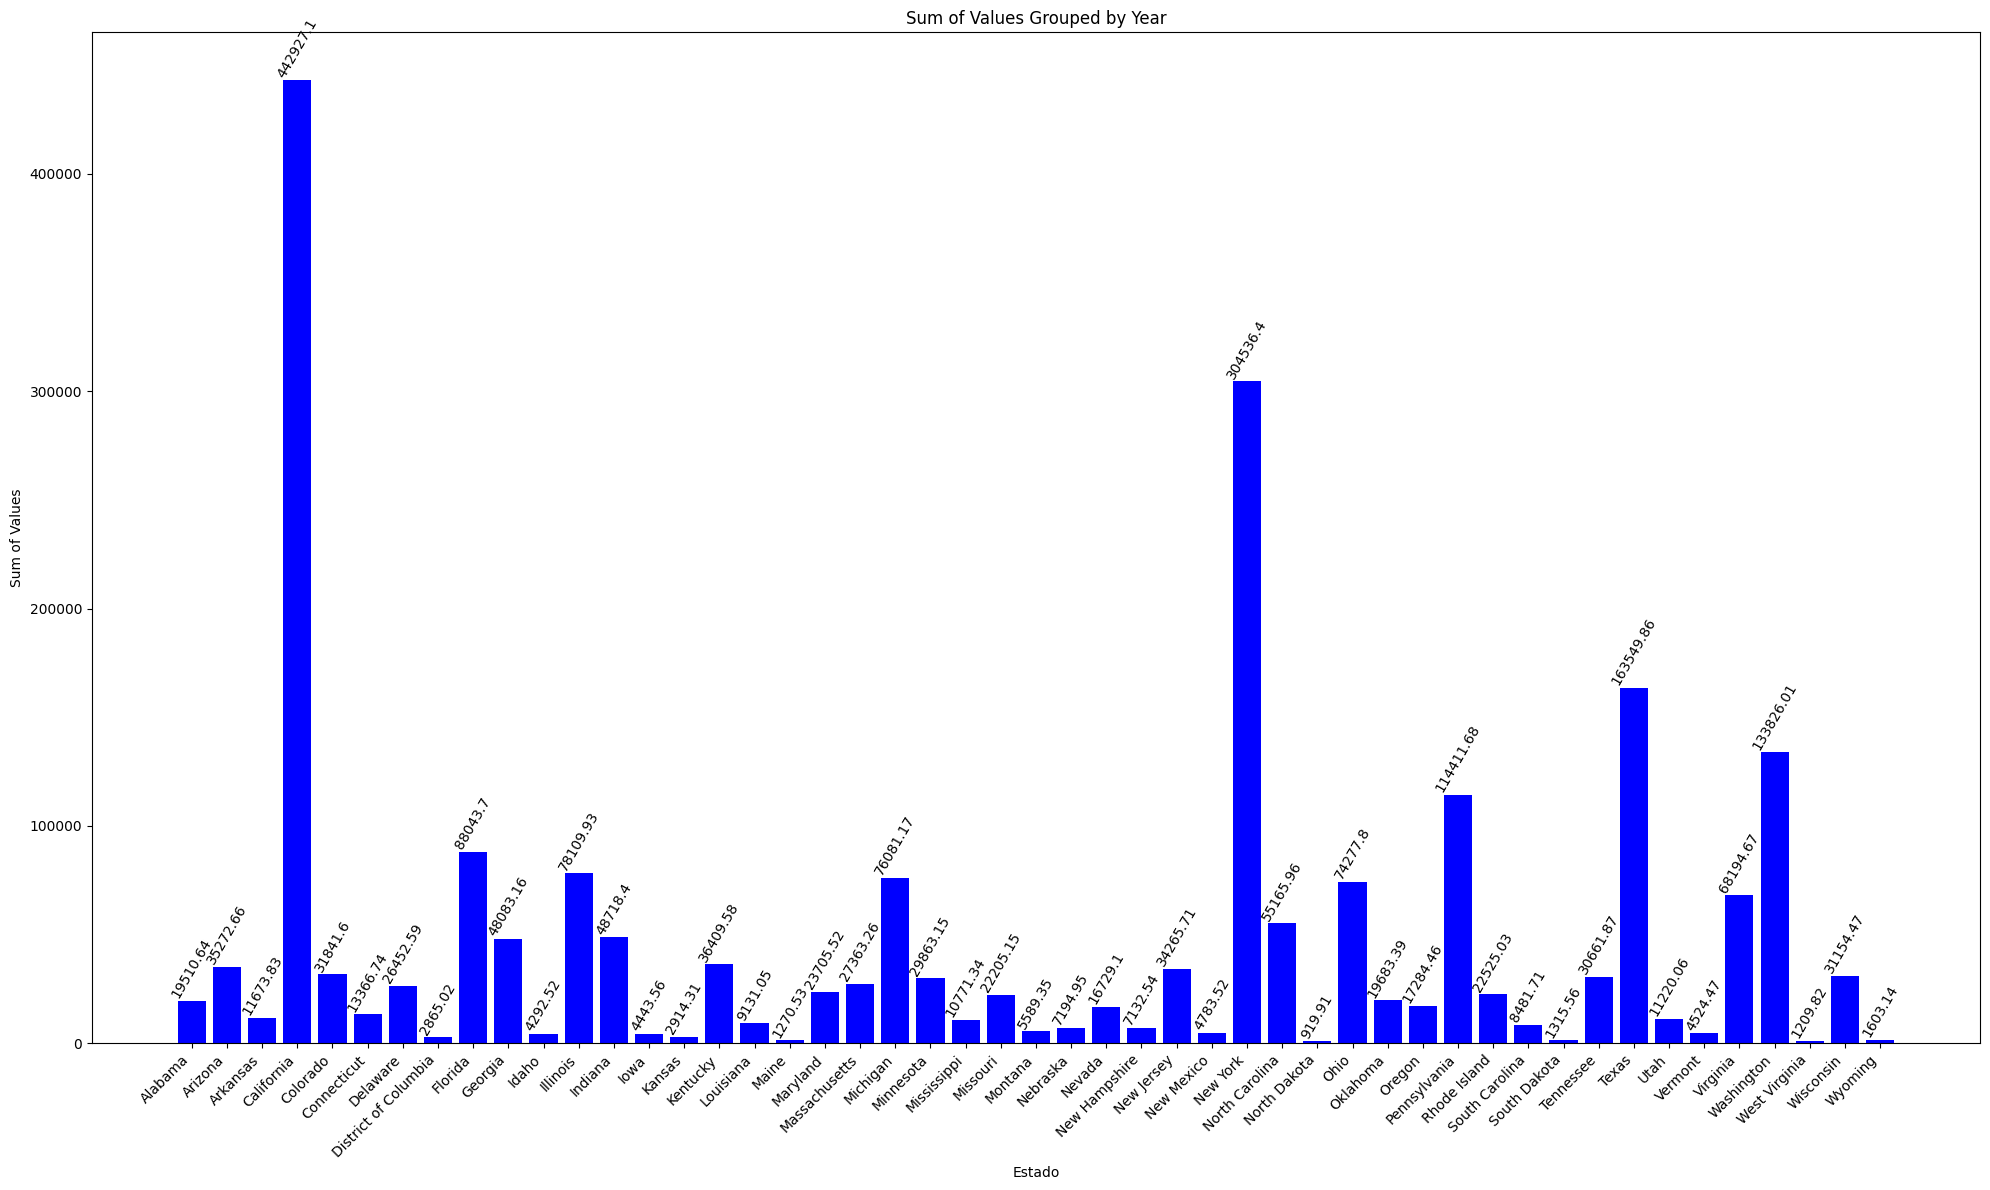

In [10]:
# Group by year and sum the values
df_grouped = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(20, 12))
bars = plt.bar(df_grouped['Estado'], df_grouped['Valor_Venda'], color='blue', width=0.8)

# Add labels and title
plt.xlabel('Estado')
plt.ylabel('Sum of Values')
plt.title('Sum of Values Grouped by Year')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', rotation=60)

plt.tight_layout()
plt.show()

# Pergunta de Negócio 4:
Quais São as 10 Cidades com Maior Total de Vendas?
Demonstre o resultado através de um gráfico de barras.

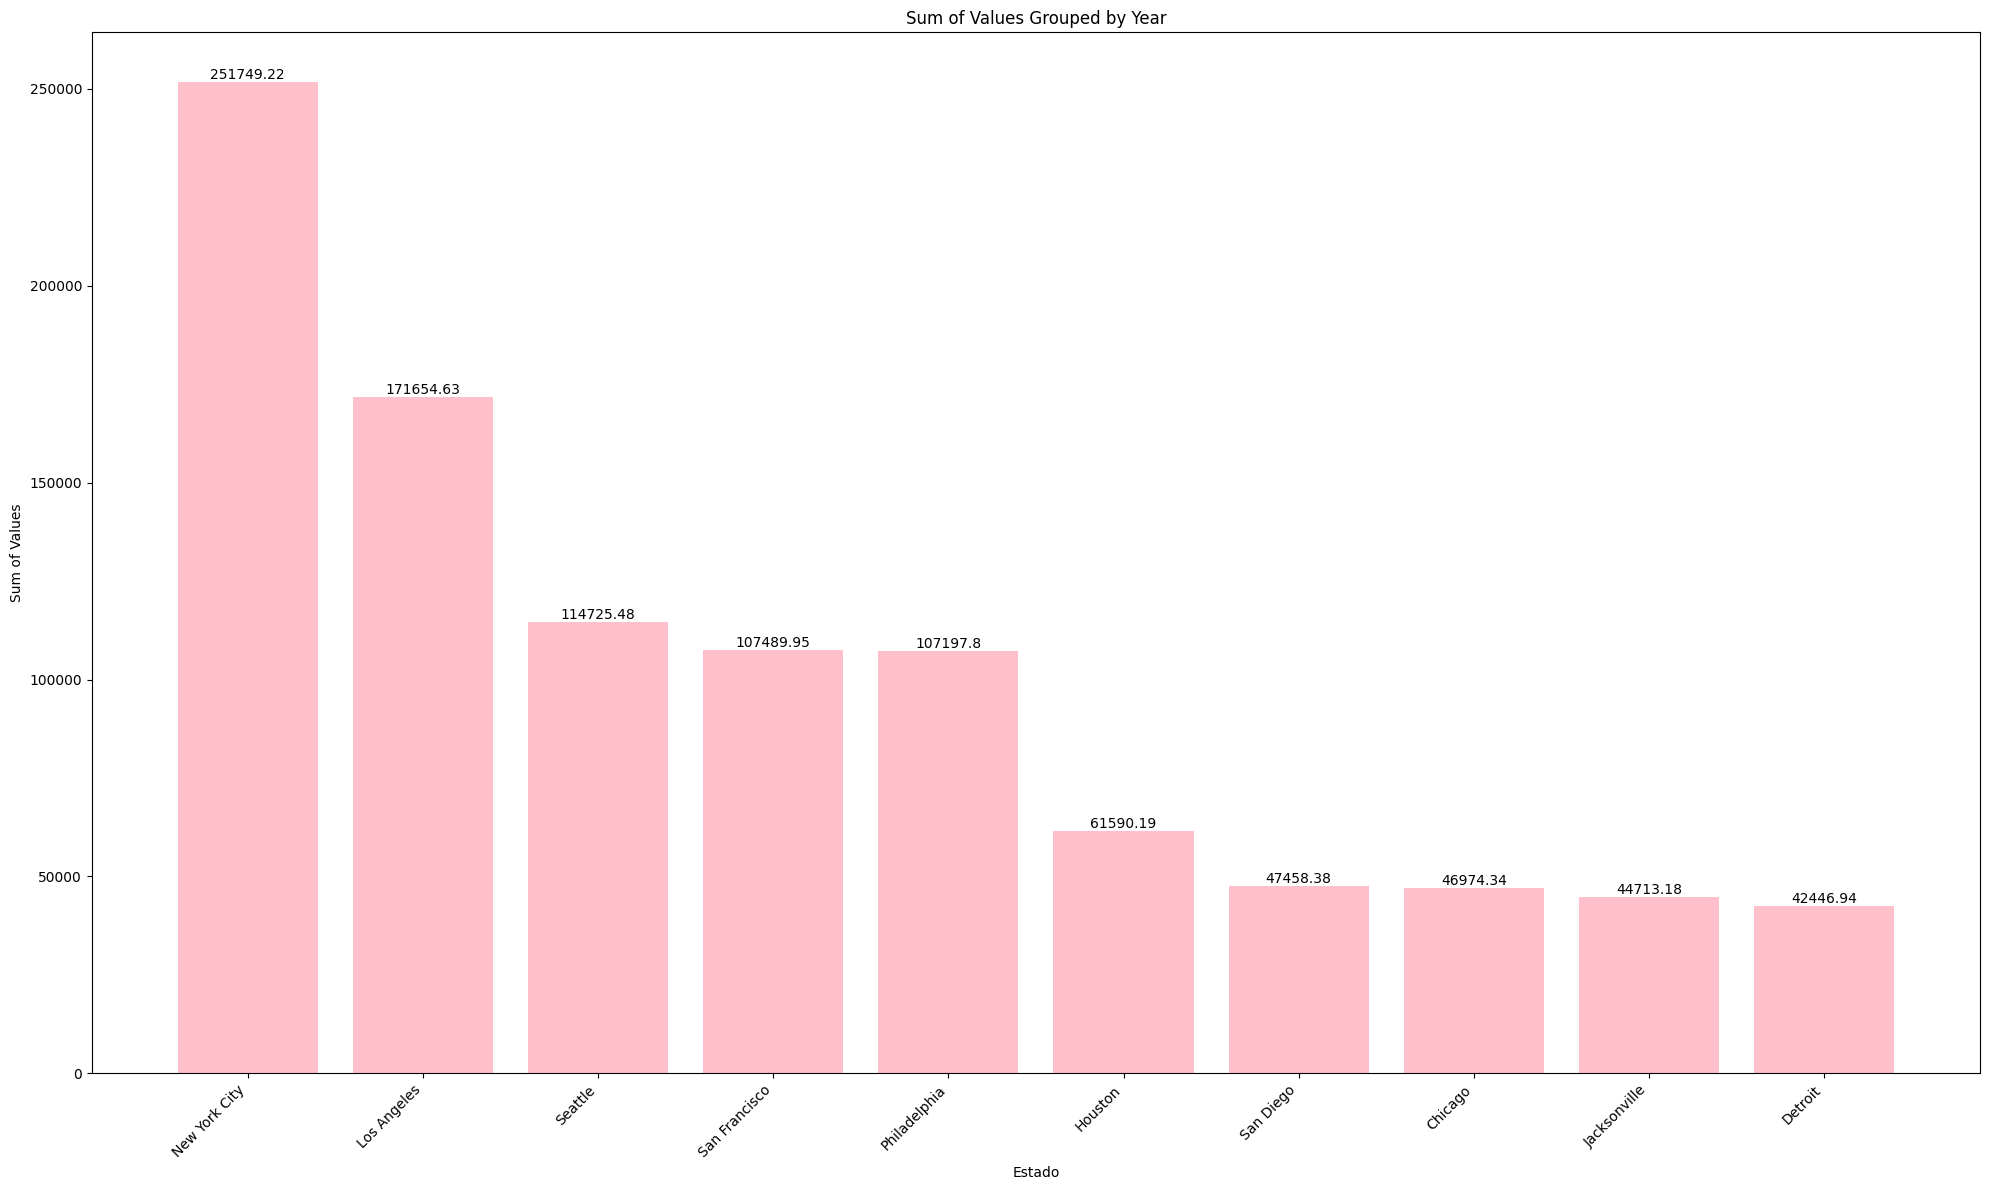

In [11]:
# Group by year and sum the values
df_grouped = df.groupby('Cidade')['Valor_Venda'].sum().reset_index()

# Sort the DataFrame by Sales in descending order
df_sorted = df_grouped.sort_values(by='Valor_Venda', ascending=False)

# Select the top 10 cities
top_10_cities = df_sorted.head(10)

# Plotting the data
plt.figure(figsize=(20, 12))
bars = plt.bar(top_10_cities['Cidade'], top_10_cities['Valor_Venda'], color='pink', width=0.8)

# Add labels and title
plt.xlabel('Estado')
plt.ylabel('Sum of Values')
plt.title('Sum of Values Grouped by Year')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# Pergunta de Negócio 5:
Qual Segmento Teve o Maior Total de Vendas?
Demonstre o resultado através de um gráfico de pizza.

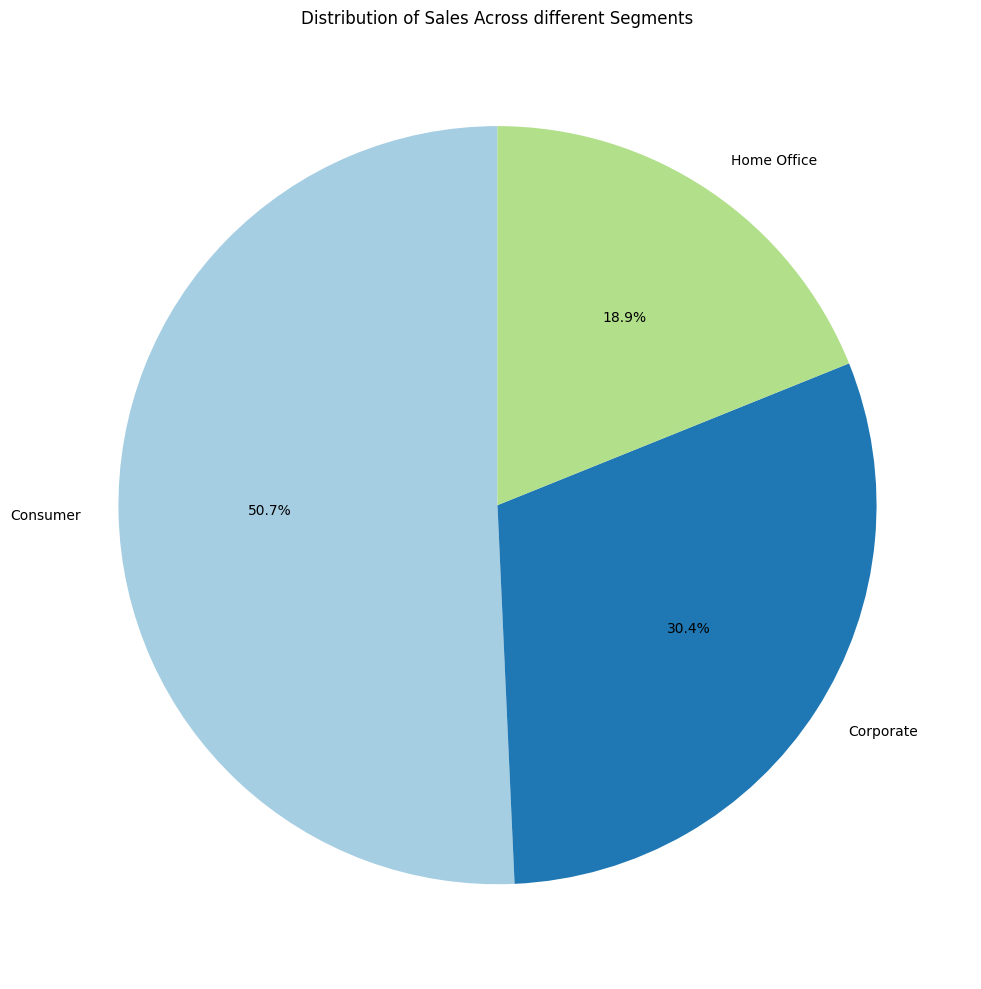

In [12]:
# Group by Segment and sum the values
df_grouped = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()



# Plotting the data
plt.figure(figsize=(10, 10))
bars = plt.pie(df_grouped['Valor_Venda'], labels=df_grouped['Segmento'],  autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add labels and title
plt.title('Distribution of Sales Across different Segments')




plt.tight_layout()
plt.show()

# Pergunta de Negócio 6 (Desafio Nível Baby):
Qual o Total de Vendas Por Segmento e Por Ano?


In [13]:
df = pd.to_datetime(df['Data_Pedido'])

df['Year'] = df['Data_Pedido'].dt.year

# Group by Segment and sum the values
df_grouped = df.groupby(['Data_Pedido', 'Segmento'])['Valor_Venda'].sum().reset_index()






KeyError: 'Data_Pedido'

In [ ]:

df_grouped = df.groupby(['Segmento'])['Valor_Venda'].sum().reset_index()
df_grouped

In [ ]:
# Pivot the DataFrame to have 'Category' as columns
df_pivot = df_grouped.pivot(columns='Segmento', values='Valor_Venda').fillna(0)

# Activate inline plotting for Jupyter notebooks
%matplotlib inline

# Plotting the data
plt.figure(figsize=(10, 8))

# Bar chart with multiple segments
bar_width = 0.35
bar_locations = df_pivot.index
bottom_values = None

for category, color in zip(df_pivot.columns, ['green', 'blue']):
    values = df_pivot[category]
    plt.bar(bar_locations, values, bar_width, label=category, color=color, bottom=bottom_values)
    if bottom_values is None:
        bottom_values = values
    else:
        bottom_values += values

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Grouped by Category and Date')
plt.legend()

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.ioff()
plt.show()

# • Pergunta de Negócio 7 (Desafio Nível Júnior):
Os gestores da empresa estão considerando conceder diferentes faixas de descontos e
gostariam de fazer uma simulação com base na regra abaixo:
Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
Quantas Vendas Receberiam 15% de Desconto?
